### Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.utils import Sequence
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa

import random

### Data Loading

In [3]:
x_real = np.load('dataset/x_real.npz')['data']
y_real = np.load('dataset/y_real.npy')

In [4]:
print(x_real.shape, y_real.shape)

(6000, 90, 90, 1) (6000, 4)


### Data Splitting

In [5]:
x_data, x_val, label_data, label_val = train_test_split(x_real, y_real, test_size=0.2)

In [6]:
print(x_data.shape, x_val.shape, label_data.shape, label_val.shape)

(4800, 90, 90, 1) (1200, 90, 90, 1) (4800, 4) (1200, 4)


In [8]:
label_real_dict = {}

for i, y in enumerate(y_real):
    print(i)
    print(y)
    key = y.astype(str)
    key = ''.join(key).zfill(6)

    label_real_dict[key] = i

0
[100   0   0   1]
1
[100   0   0   4]
2
[100   0   0   2]
3
[100   0   0   3]
4
[100   0   0   0]
5
[100   0   1   1]
6
[100   0   1   4]
7
[100   0   1   2]
8
[100   0   1   3]
9
[100   0   1   0]
10
[101   0   0   1]
11
[101   0   0   4]
12
[101   0   0   2]
13
[101   0   0   3]
14
[101   0   0   0]
15
[101   0   1   1]
16
[101   0   1   4]
17
[101   0   1   2]
18
[101   0   1   3]
19
[101   0   1   0]
20
[102   0   0   1]
21
[102   0   0   4]
22
[102   0   0   2]
23
[102   0   0   3]
24
[102   0   0   0]
25
[102   0   1   1]
26
[102   0   1   4]
27
[102   0   1   2]
28
[102   0   1   3]
29
[102   0   1   0]
30
[103   1   0   1]
31
[103   1   0   4]
32
[103   1   0   2]
33
[103   1   0   3]
34
[103   1   0   0]
35
[103   1   1   1]
36
[103   1   1   4]
37
[103   1   1   2]
38
[103   1   1   3]
39
[103   1   1   0]
40
[104   0   0   1]
41
[104   0   0   4]
42
[104   0   0   2]
43
[104   0   0   3]
44
[104   0   0   0]
45
[104   0   1   1]
46
[104   0   1   4]
47
[104   0   1   2]
48

[185   0   1   1]
936
[185   0   1   4]
937
[185   0   1   2]
938
[185   0   1   3]
939
[185   0   1   0]
940
[186   0   0   1]
941
[186   0   0   4]
942
[186   0   0   2]
943
[186   0   0   3]
944
[186   0   0   0]
945
[186   0   1   1]
946
[186   0   1   4]
947
[186   0   1   2]
948
[186   0   1   3]
949
[186   0   1   0]
950
[187   0   0   1]
951
[187   0   0   4]
952
[187   0   0   2]
953
[187   0   0   3]
954
[187   0   0   0]
955
[187   0   1   1]
956
[187   0   1   4]
957
[187   0   1   2]
958
[187   0   1   3]
959
[187   0   1   0]
960
[188   0   0   1]
961
[188   0   0   4]
962
[188   0   0   2]
963
[188   0   0   3]
964
[188   0   0   0]
965
[188   0   1   1]
966
[188   0   1   4]
967
[188   0   1   2]
968
[188   0   1   3]
969
[188   0   1   0]
970
[189   1   0   1]
971
[189   1   0   4]
972
[189   1   0   2]
973
[189   1   0   3]
974
[189   1   0   0]
975
[189   1   1   1]
976
[189   1   1   4]
977
[189   1   1   2]
978
[189   1   1   3]
979
[189   1   1   0]
980
[18  0  0 

1542
[23  0  0  2]
1543
[23  0  0  3]
1544
[23  0  0  0]
1545
[23  0  1  1]
1546
[23  0  1  4]
1547
[23  0  1  2]
1548
[23  0  1  3]
1549
[23  0  1  0]
1550
[240   1   0   1]
1551
[240   1   0   4]
1552
[240   1   0   2]
1553
[240   1   0   3]
1554
[240   1   0   0]
1555
[240   1   1   1]
1556
[240   1   1   4]
1557
[240   1   1   2]
1558
[240   1   1   3]
1559
[240   1   1   0]
1560
[241   0   0   1]
1561
[241   0   0   4]
1562
[241   0   0   2]
1563
[241   0   0   3]
1564
[241   0   0   0]
1565
[241   0   1   1]
1566
[241   0   1   4]
1567
[241   0   1   2]
1568
[241   0   1   3]
1569
[241   0   1   0]
1570
[242   0   0   1]
1571
[242   0   0   4]
1572
[242   0   0   2]
1573
[242   0   0   3]
1574
[242   0   0   0]
1575
[242   0   1   1]
1576
[242   0   1   4]
1577
[242   0   1   2]
1578
[242   0   1   3]
1579
[242   0   1   0]
1580
[243   0   0   1]
1581
[243   0   0   4]
1582
[243   0   0   2]
1583
[243   0   0   3]
1584
[243   0   0   0]
1585
[243   0   1   1]
1586
[243   0   1   

[303   1   1   1]
2256
[303   1   1   4]
2257
[303   1   1   2]
2258
[303   1   1   3]
2259
[303   1   1   0]
2260
[304   0   0   1]
2261
[304   0   0   4]
2262
[304   0   0   2]
2263
[304   0   0   3]
2264
[304   0   0   0]
2265
[304   0   1   1]
2266
[304   0   1   4]
2267
[304   0   1   2]
2268
[304   0   1   3]
2269
[304   0   1   0]
2270
[305   0   0   1]
2271
[305   0   0   4]
2272
[305   0   0   2]
2273
[305   0   0   3]
2274
[305   0   0   0]
2275
[305   0   1   1]
2276
[305   0   1   4]
2277
[305   0   1   2]
2278
[305   0   1   3]
2279
[305   0   1   0]
2280
[306   0   0   1]
2281
[306   0   0   4]
2282
[306   0   0   2]
2283
[306   0   0   3]
2284
[306   0   0   0]
2285
[306   0   1   1]
2286
[306   0   1   4]
2287
[306   0   1   2]
2288
[306   0   1   3]
2289
[306   0   1   0]
2290
[307   0   0   1]
2291
[307   0   0   4]
2292
[307   0   0   2]
2293
[307   0   0   3]
2294
[307   0   0   0]
2295
[307   0   1   1]
2296
[307   0   1   4]
2297
[307   0   1   2]
2298
[307   0   

[379   1   1   4]
3087
[379   1   1   2]
3088
[379   1   1   3]
3089
[379   1   1   0]
3090
[37  0  0  1]
3091
[37  0  0  4]
3092
[37  0  0  2]
3093
[37  0  0  3]
3094
[37  0  0  0]
3095
[37  0  1  1]
3096
[37  0  1  4]
3097
[37  0  1  2]
3098
[37  0  1  3]
3099
[37  0  1  0]
3100
[380   0   0   1]
3101
[380   0   0   4]
3102
[380   0   0   2]
3103
[380   0   0   3]
3104
[380   0   0   0]
3105
[380   0   1   1]
3106
[380   0   1   4]
3107
[380   0   1   2]
3108
[380   0   1   3]
3109
[380   0   1   0]
3110
[381   0   0   1]
3111
[381   0   0   4]
3112
[381   0   0   2]
3113
[381   0   0   3]
3114
[381   0   0   0]
3115
[381   0   1   1]
3116
[381   0   1   4]
3117
[381   0   1   2]
3118
[381   0   1   3]
3119
[381   0   1   0]
3120
[382   0   0   1]
3121
[382   0   0   4]
3122
[382   0   0   2]
3123
[382   0   0   3]
3124
[382   0   0   0]
3125
[382   0   1   1]
3126
[382   0   1   4]
3127
[382   0   1   2]
3128
[382   0   1   3]
3129
[382   0   1   0]
3130
[383   0   0   1]
3131
[383 

[447   0   1   2]
3848
[447   0   1   3]
3849
[447   0   1   0]
3850
[448   0   0   1]
3851
[448   0   0   4]
3852
[448   0   0   2]
3853
[448   0   0   3]
3854
[448   0   0   0]
3855
[448   0   1   1]
3856
[448   0   1   4]
3857
[448   0   1   2]
3858
[448   0   1   3]
3859
[448   0   1   0]
3860
[449   1   0   1]
3861
[449   1   0   4]
3862
[449   1   0   2]
3863
[449   1   0   3]
3864
[449   1   0   0]
3865
[449   1   1   1]
3866
[449   1   1   4]
3867
[449   1   1   2]
3868
[449   1   1   3]
3869
[449   1   1   0]
3870
[44  0  0  1]
3871
[44  0  0  4]
3872
[44  0  0  2]
3873
[44  0  0  3]
3874
[44  0  0  0]
3875
[44  0  1  1]
3876
[44  0  1  4]
3877
[44  0  1  2]
3878
[44  0  1  3]
3879
[44  0  1  0]
3880
[450   0   0   1]
3881
[450   0   0   4]
3882
[450   0   0   2]
3883
[450   0   0   3]
3884
[450   0   0   0]
3885
[450   0   1   1]
3886
[450   0   1   4]
3887
[450   0   1   2]
3888
[450   0   1   3]
3889
[450   0   1   0]
3890
[451   0   0   1]
3891
[451   0   0   4]
3892
[451 

[516   0   0   1]
4611
[516   0   0   4]
4612
[516   0   0   2]
4613
[516   0   0   3]
4614
[516   0   0   0]
4615
[516   0   1   1]
4616
[516   0   1   4]
4617
[516   0   1   2]
4618
[516   0   1   3]
4619
[516   0   1   0]
4620
[517   0   0   1]
4621
[517   0   0   4]
4622
[517   0   0   2]
4623
[517   0   0   3]
4624
[517   0   0   0]
4625
[517   0   1   1]
4626
[517   0   1   4]
4627
[517   0   1   2]
4628
[517   0   1   3]
4629
[517   0   1   0]
4630
[518   0   0   1]
4631
[518   0   0   4]
4632
[518   0   0   2]
4633
[518   0   0   3]
4634
[518   0   0   0]
4635
[518   0   1   1]
4636
[518   0   1   4]
4637
[518   0   1   2]
4638
[518   0   1   3]
4639
[518   0   1   0]
4640
[519   0   0   1]
4641
[519   0   0   4]
4642
[519   0   0   2]
4643
[519   0   0   3]
4644
[519   0   0   0]
4645
[519   0   1   1]
4646
[519   0   1   4]
4647
[519   0   1   2]
4648
[519   0   1   3]
4649
[519   0   1   0]
4650
[51  0  0  1]
4651
[51  0  0  4]
4652
[51  0  0  2]
4653
[51  0  0  3]
4654
[51 

[572   1   1   4]
5237
[572   1   1   2]
5238
[572   1   1   3]
5239
[572   1   1   0]
5240
[573   1   0   1]
5241
[573   1   0   4]
5242
[573   1   0   2]
5243
[573   1   0   3]
5244
[573   1   0   0]
5245
[573   1   1   1]
5246
[573   1   1   4]
5247
[573   1   1   2]
5248
[573   1   1   3]
5249
[573   1   1   0]
5250
[574   1   0   1]
5251
[574   1   0   4]
5252
[574   1   0   2]
5253
[574   1   0   3]
5254
[574   1   0   0]
5255
[574   1   1   1]
5256
[574   1   1   4]
5257
[574   1   1   2]
5258
[574   1   1   3]
5259
[574   1   1   0]
5260
[575   0   0   1]
5261
[575   0   0   4]
5262
[575   0   0   2]
5263
[575   0   0   3]
5264
[575   0   0   0]
5265
[575   0   1   1]
5266
[575   0   1   4]
5267
[575   0   1   2]
5268
[575   0   1   3]
5269
[575   0   1   0]
5270
[576   0   0   1]
5271
[576   0   0   4]
5272
[576   0   0   2]
5273
[576   0   0   3]
5274
[576   0   0   0]
5275
[576   0   1   1]
5276
[576   0   1   4]
5277
[576   0   1   2]
5278
[576   0   1   3]
5279
[576   0   

[97  0  1  4]
5967
[97  0  1  2]
5968
[97  0  1  3]
5969
[97  0  1  0]
5970
[98  0  0  1]
5971
[98  0  0  4]
5972
[98  0  0  2]
5973
[98  0  0  3]
5974
[98  0  0  0]
5975
[98  0  1  1]
5976
[98  0  1  4]
5977
[98  0  1  2]
5978
[98  0  1  3]
5979
[98  0  1  0]
5980
[99  0  0  1]
5981
[99  0  0  4]
5982
[99  0  0  2]
5983
[99  0  0  3]
5984
[99  0  0  0]
5985
[99  0  1  1]
5986
[99  0  1  4]
5987
[99  0  1  2]
5988
[99  0  1  3]
5989
[99  0  1  0]
5990
[9 0 0 1]
5991
[9 0 0 4]
5992
[9 0 0 2]
5993
[9 0 0 3]
5994
[9 0 0 0]
5995
[9 0 1 1]
5996
[9 0 1 4]
5997
[9 0 1 2]
5998
[9 0 1 3]
5999
[9 0 1 0]


In [9]:
label_real_dict

{'100001': 0,
 '100004': 1,
 '100002': 2,
 '100003': 3,
 '100000': 4,
 '100011': 5,
 '100014': 6,
 '100012': 7,
 '100013': 8,
 '100010': 9,
 '101001': 10,
 '101004': 11,
 '101002': 12,
 '101003': 13,
 '101000': 14,
 '101011': 15,
 '101014': 16,
 '101012': 17,
 '101013': 18,
 '101010': 19,
 '102001': 20,
 '102004': 21,
 '102002': 22,
 '102003': 23,
 '102000': 24,
 '102011': 25,
 '102014': 26,
 '102012': 27,
 '102013': 28,
 '102010': 29,
 '103101': 30,
 '103104': 31,
 '103102': 32,
 '103103': 33,
 '103100': 34,
 '103111': 35,
 '103114': 36,
 '103112': 37,
 '103113': 38,
 '103110': 39,
 '104001': 40,
 '104004': 41,
 '104002': 42,
 '104003': 43,
 '104000': 44,
 '104011': 45,
 '104014': 46,
 '104012': 47,
 '104013': 48,
 '104010': 49,
 '105001': 50,
 '105004': 51,
 '105002': 52,
 '105003': 53,
 '105000': 54,
 '105011': 55,
 '105014': 56,
 '105012': 57,
 '105013': 58,
 '105010': 59,
 '106001': 60,
 '106004': 61,
 '106002': 62,
 '106003': 63,
 '106000': 64,
 '106011': 65,
 '106014': 66,
 '106

In [10]:
class DataGenerator(Sequence):
    def __init__(self, x, label, x_real, label_real_dict, batch_size=32, shuffle=True):
        'Initialization'
        self.x = x
        self.label = label
        self.x_real = x_real
        self.label_real_dict = label_real_dict
        
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.x) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        x1_batch = self.x[index*self.batch_size:(index+1)*self.batch_size]
        label_batch = self.label[index*self.batch_size:(index+1)*self.batch_size]
        
        x2_batch = np.empty((self.batch_size, 90, 90, 1), dtype=np.float32)
        y_batch = np.zeros((self.batch_size, 1), dtype=np.float32)
        
        # augmentation
        if self.shuffle:
            seq = iaa.Sequential([
                iaa.GaussianBlur(sigma=(0, 0.5)),
                iaa.Affine(
                    scale={"x": (0.9, 1.1), "y": (0.9, 1.1)},
                    translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},
                    rotate=(-30, 30),
                    order=[0, 1],
                    cval=255
                )
            ], random_order=True)

            x1_batch = seq.augment_images(x1_batch)
        for i, l in enumerate(label_batch):
            match_key = l.astype(str)
            match_key = ''.join(match_key).zfill(6)

            if random.random() > 0.5:
                # put matched image
                x2_batch[i] = self.x_real[self.label_real_dict[match_key]]
                y_batch[i] = 1.
            else:
                # put unmatched image
                while True:
                    unmatch_key, unmatch_idx = random.choice(list(self.label_real_dict.items()))

                    if unmatch_key != match_key:
                        break

                x2_batch[i] = self.x_real[unmatch_idx]
                y_batch[i] = 0.

        return [x1_batch.astype(np.float32) / 255., x2_batch.astype(np.float32) / 255.], y_batch

    def on_epoch_end(self):
        if self.shuffle == True:
            self.x, self.label = shuffle(self.x, self.label)

In [11]:
train_gen = DataGenerator(x_data, label_data, x_real, label_real_dict, shuffle=True)
val_gen = DataGenerator(x_val, label_val, x_real, label_real_dict, shuffle=False)

In [12]:
print("Training Data Batch Size:",len(train_gen))
print("Validation Data Batch Size:",len(val_gen))

Training Data Batch Size: 150
Validation Data Batch Size: 37


### Algorithm -  Convolutional Neural Network

In [14]:
x1 = layers.Input(shape=(90, 90, 1))
x2 = layers.Input(shape=(90, 90, 1))

# share weights both inputs
inputs = layers.Input(shape=(90, 90, 1))

feature = layers.Conv2D(32, kernel_size=3, padding='same', activation='relu')(inputs)
feature = layers.MaxPooling2D(pool_size=2)(feature)

feature = layers.Conv2D(32, kernel_size=3, padding='same', activation='relu')(feature)
feature = layers.MaxPooling2D(pool_size=2)(feature)

feature_model = Model(inputs=inputs, outputs=feature)

# 2 feature models that sharing weights
x1_net = feature_model(x1)
x2_net = feature_model(x2)

# subtract features
net = layers.Subtract()([x1_net, x2_net])

net = layers.Conv2D(32, kernel_size=3, padding='same', activation='relu')(net)
net = layers.MaxPooling2D(pool_size=2)(net)

net = layers.Flatten()(net)

net = layers.Dense(64, activation='relu')(net)

net = layers.Dense(1, activation='sigmoid')(net)

model = Model(inputs=[x1, x2], outputs=net)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 90, 90, 1)]  0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 90, 90, 1)]  0           []                               
                                                                                                  
 model (Functional)             (None, 22, 22, 32)   9568        ['input_1[0][0]',                
                                                                  'input_2[0][0]']                
                                                                                                  
 subtract (Subtract)            (None, 22, 22, 32)   0           ['model[0][0]',            

In [15]:
history = model.fit_generator(train_gen, epochs=10, validation_data=val_gen)

Epoch 1/10
150/150 [==============================] - 51s 337ms/step - loss: 0.3512 - accuracy: 0.8321 - val_loss: 0.2009 - val_accuracy: 0.9417
Epoch 2/10
150/150 [==============================] - 52s 347ms/step - loss: 0.1978 - accuracy: 0.9217 - val_loss: 0.1665 - val_accuracy: 0.9409
Epoch 3/10
150/150 [==============================] - 51s 340ms/step - loss: 0.1656 - accuracy: 0.9321 - val_loss: 0.0549 - val_accuracy: 0.9882
Epoch 4/10
150/150 [==============================] - 51s 340ms/step - loss: 0.1372 - accuracy: 0.9435 - val_loss: 0.0767 - val_accuracy: 0.9738
Epoch 5/10
150/150 [==============================] - 51s 340ms/step - loss: 0.1233 - accuracy: 0.9488 - val_loss: 0.0620 - val_accuracy: 0.9730
Epoch 6/10
150/150 [==============================] - 53s 350ms/step - loss: 0.1143 - accuracy: 0.9550 - val_loss: 0.0412 - val_accuracy: 0.9840
Epoch 7/10
150/150 [==============================] - 52s 346ms/step - loss: 0.1119 - accuracy: 0.9571 - val_loss: 0.0383 - val_ac

### Accuracy and Loss plot-graphs

***Accuracy plot-graphs***

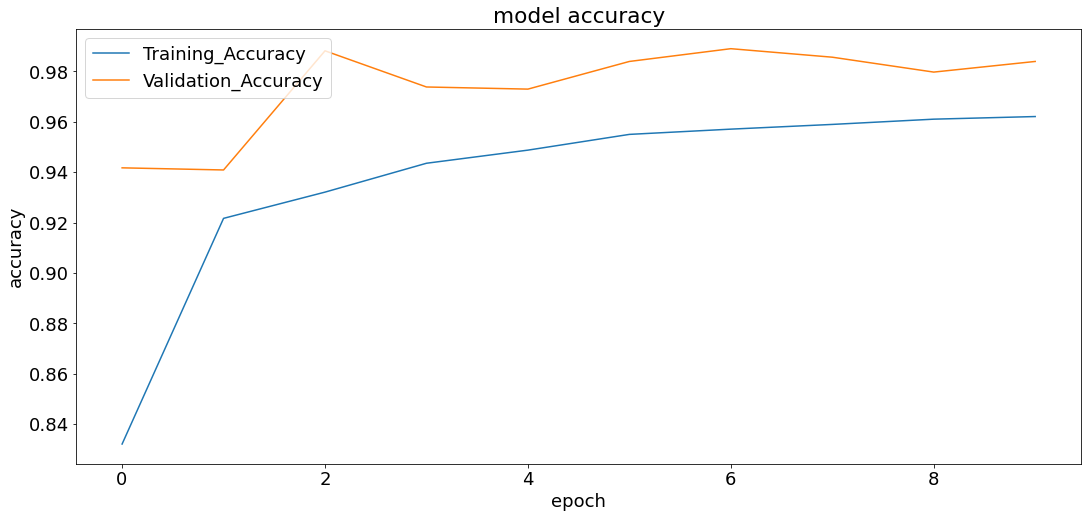

In [16]:
plt.figure(figsize=(18,8))
plt.rcParams["font.size"]=18
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training_Accuracy', 'Validation_Accuracy'], loc='upper left')
plt.show()

***Loss plot-graphs***

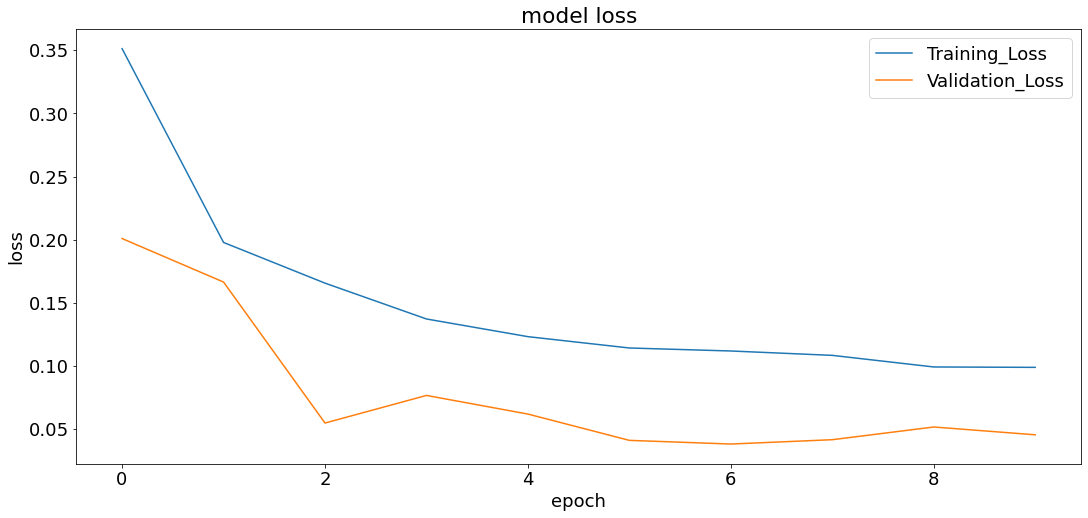

In [17]:
plt.figure(figsize=(18,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training_Loss', 'Validation_Loss'], loc='upper right')
plt.show()

In [18]:
model.save("model/Convolutional_Neural_Network_model.h5")

## Thank You